org_directory_path:  /home/jwjang/project/cyclegan_pix2pix_pr/2step/CycleGAN-and-pix2pix/datasets/maps/test
png_files 개수:  1
org_png_files 개수:  1
generated_images 개수:  1
ground_truth_images 개수:  1
generated_images_resized shape:  (512, 512, 3)
ground_truth_images shape:  (512, 512)
ground_truth_images_expanded shape:  (512, 512, 1)
*ground_truth_expanded:  (512, 1)
*generated_expanded:  (512, 3)
***ground_truth_expanded:  (512, 1)
***generated_expanded:  (512, 3)
Average Class IOU: 0.013405513878031992
Average Per-pixel Accuracy: 0.02629852294921875


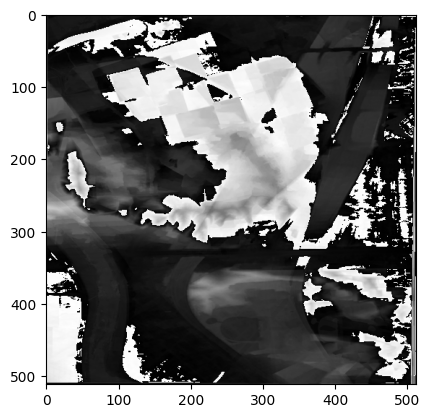

In [6]:
## pix2pix 모델

import os
from options.test_options import TestOptions
from data import create_dataset
from models import create_model
from util.visualizer import save_images
from util import html
import numpy as np
from sklearn.metrics import confusion_matrix
import glob
from PIL import Image
import matplotlib.pyplot as plt

def calculate_class_iou(ground_truth, prediction):
    intersection = np.sum(np.where(np.all(ground_truth == prediction, axis=2), 1, 0))
    ground_truth_sum = np.sum(np.all(ground_truth > 0, axis=2))
    prediction_sum = np.sum(np.all(prediction > 0, axis=2))
    iou = intersection / (ground_truth_sum + prediction_sum - intersection)
    return iou

def calculate_per_class_accuracy(ground_truth, prediction):
    conf_matrix = confusion_matrix(np.argmax(ground_truth, axis=2), np.argmax(prediction, axis=2))
    accuracy = np.sum(conf_matrix.diagonal()) / conf_matrix.sum()
    return accuracy

def calculate_per_pixel_accuracy(ground_truth, prediction):
    accuracy = np.mean(np.all(ground_truth == prediction, axis=2))
    return accuracy

# 생성된 이미지 디렉토리 경로 설정
directory_path = '/home/jwjang/project/cyclegan_pix2pix_pr/2step/CycleGAN-and-pix2pix/results/maps_pix2pix/test_latest/images'
# 정답 이미지 디렉토리 경로 설정
org_directory_path = '/home/jwjang/project/cyclegan_pix2pix_pr/2step/CycleGAN-and-pix2pix/datasets/maps/test'
print('org_directory_path: ', org_directory_path)

# 해당 디렉토리에 있는 모든 PNG 파일 가져오기
pred_png_files = glob.glob(directory_path + '/57_DEM_real_B.png')
org_png_files = glob.glob(org_directory_path + '/*.bmp')

print('png_files 개수: ', len(pred_png_files))
print('org_png_files 개수: ', len(org_png_files))

# gt_png_files = [png_files[i].replace('.png', '_gt.png') for i in range(len(png_files))]

arg_size = (512, 512)

generated_images_resized = []
for img_path in org_png_files:
    img = Image.open(img_path)
    Image.ANTIALIAS = Image.LANCZOS
    resized_img = img.resize(arg_size, Image.ANTIALIAS)
    generated_images_resized.append(np.array(resized_img))

# ground_truth_images = [np.array(Image.open(org_png_files[i])) for i in range(len(org_png_files))]
generated_images = [np.array(Image.open(pred_png_files[i])) for i in range(len(pred_png_files))]

print('generated_images 개수: ', len(generated_images))
print('ground_truth_images 개수: ', len(generated_images_resized))
print('generated_images_resized shape: ', generated_images[0].shape) #  (512, 512, 3)
print('ground_truth_images shape: ', generated_images_resized[0].shape) # (512, 512)

generated_images_resized[0] = np.expand_dims(generated_images_resized[0], axis=2) # 차원 확장
print('ground_truth_images_expanded shape: ',generated_images_resized[0].shape) #  (512, 512, 1) # 왜 차원 확장하면 값이 ?
plt.imshow(abs(generated_images[0]-generated_images_resized[0]))

for ground_truth, generated in zip(generated_images_resized, generated_images):
    print('*ground_truth_expanded: ', ground_truth[0].shape) # (512,)
    print('*generated_expanded: ', generated[0].shape) # (512, 3)
    # ground_truth = np.expand_dims(ground_truth, axis=2) # 차원 확장
    print('***ground_truth_expanded: ', ground_truth[0].shape) # (512, 1)
    print('***generated_expanded: ', generated[0].shape) # (512, 3)
    # plt.imshow(ground_truth-generated)

class_iou = 0
per_class_accuracy = 0
per_pixel_accuracy = 0
for ground_truth, generated in zip(generated_images_resized, generated_images):
    # ground_truth = np.expand_dims(ground_truth, axis=2) # 차원 확장
    class_iou += calculate_class_iou(ground_truth, generated)
    # per_class_accuracy += calculate_per_class_accuracy(ground_truth, generated)
    per_pixel_accuracy += calculate_per_pixel_accuracy(ground_truth, generated)

# 평균 평가 지표 계산
average_class_iou = class_iou / len(generated_images_resized)
# average_per_class_accuracy = per_class_accuracy / len(generated_images_resized)
average_per_pixel_accuracy = per_pixel_accuracy / len(generated_images_resized)

print("Average Class IOU:", average_class_iou)
# print("Average Per-class Accuracy:", average_per_class_accuracy)
print("Average Per-pixel Accuracy:", average_per_pixel_accuracy)
